In [2]:
import requests
import os
url = "https://newsnow.p.rapidapi.com/newsv2"
payload = {
    "query": "Afterpay",
    "page": 1,
    "time_bounded": True,
    "from_date": "01/02/2015",
    "to_date": "11/06/2023",
    "location": "",
    "category": "",
    "source": ""
}

headers = {
    "content-type": "application/json",
    "X-RapidAPI-Key": "",
    "X-RapidAPI-Host": "newsnow.p.rapidapi.com"
}

all_news_data = []

while True:
    response = requests.post(url, json=payload, headers=headers)
    data = response.json()
    news_data = data.get('news', [])
    if not news_data:
        print(f"No more news found on page {payload['page']}")
        break
    all_news_data.extend(news_data)
    payload['page'] += 1

for item in all_news_data:
    print(item['title'], item['date'])
#this printed data is then saved into a txt file to 

No more news found on page 6
Square to buy Australia's Afterpay in $29 billion deal as 'buy now, pay later' trend takes off Aug 1, 2021
The $29 billion deal in 11 weeks: how Square bought Afterpay Aug 3, 2021
Square to Acquire 'Buy Now, Pay Later' Firm Afterpay Aug 1, 2021
Afterpay and Stripe Partner to Offer 'Buy Now, Pay Later ... Feb 24, 2021
Afterpay Installment Service Morphing Into Shopping Gateway Feb 25, 2021
Squarespace is the First E-Commerce Platform to Leverage the New Afterpay-Stripe Partnership Feb 24, 2021
Australia's Afterpay weighs U.S. listing as 'buy now, pay later' takes off Apr 19, 2021
Should You Buy Now, Pay Later? Tread Carefully. (Published ... Jun 23, 2022
The potential downsides of buy now, pay later programs like Affirm and Afterpay Aug 4, 2021
Afterpay Expands Service to Largest Online Brands Jun 23, 2021
Afterpay's meteoric rise as a lending pioneer Jan 19, 2022
Runway success: Porsche at Afterpay Australian Fashion ... May 18, 2023
Afterpay Expands Into E

In [3]:
import pandas as pd
import ast

file_path1 = 'affirm2015.txt'
file_path2 = 'afterpay2015.txt'
file_path3 = 'klarna2015.txt'

#read affirm
with open(file_path1, 'r', encoding='utf-8') as file:
    file_content = file.read()
try:
    parsed_data = ast.literal_eval(file_content)
    df_affirm = pd.DataFrame(parsed_data)
    parsing_success = True
except Exception as e:
    parsing_success = False
    error_message = str(e)

#read afterpay
with open(file_path2, 'r', encoding='utf-8') as file:
    file_content = file.read()
try:
    parsed_data = ast.literal_eval(file_content)
    df_afterpay = pd.DataFrame(parsed_data)
    parsing_success = True
except Exception as e:
    parsing_success = False
    error_message = str(e)

#read klarna
with open(file_path3, 'r', encoding='utf-8') as file:
    file_content = file.read()
try:
    parsed_data = ast.literal_eval(file_content)
    df_klarna = pd.DataFrame(parsed_data)
    parsing_success = True
except Exception as e:
    parsing_success = False
    error_message = str(e)




In [4]:
#change names so that arent factored into sentiment
df_affirm['title'] = df_affirm['title'].str.replace(r'\baffirm\b', 'The company', case=False, regex=True)
df_afterpay['title'] = df_afterpay['title'].str.replace(r'\bafterpay\b', 'The company', case=False, regex=True)

These next three are getting sentiment of each headline for each company, then adding to dataframe and exporting to a csv so repeated calls do not need to be made

In [ ]:
import requests
def get_sentiment(text):
    url = "https://twinword-sentiment-analysis.p.rapidapi.com/analyze/"
    querystring = {"text": text}
    headers = {
		"X-RapidAPI-Key": "",
		"X-RapidAPI-Host": "twinword-sentiment-analysis.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        return response.json().get('score', None)
    else:
        return None

df_klarna['compound'] = df_klarna['title'].apply(get_sentiment)
csv_file_path = 'klarnaDF.csv'
df_klarna.to_csv(csv_file_path, index=False)


In [ ]:
import requests
def get_sentiment(text):
    url = "https://twinword-sentiment-analysis.p.rapidapi.com/analyze/"
    querystring = {"text": text}
    headers = {
		"X-RapidAPI-Key": "",
		"X-RapidAPI-Host": "twinword-sentiment-analysis.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        return response.json().get('score', None)
    else:
        return None

df_affirm['compound'] = df_affirm['title'].apply(get_sentiment)
csv_file_path = 'affirmDF.csv'
df_affirm.to_csv(csv_file_path, index=False)

In [ ]:
import requests
def get_sentiment(text):
    url = "https://twinword-sentiment-analysis.p.rapidapi.com/analyze/"
    querystring = {"text": text}
    headers = {
		"X-RapidAPI-Key": "",
		"X-RapidAPI-Host": "twinword-sentiment-analysis.p.rapidapi.com"
    }
    
    response = requests.get(url, headers=headers, params=querystring)
    if response.status_code == 200:
        return response.json().get('score', None)
    else:
        return None

df_afterpay['compound'] = df_afterpay['title'].apply(get_sentiment)
csv_file_path = 'afterpayDF.csv'
df_afterpay.to_csv(csv_file_path, index=False)

This next cell is for reading and formatting the data so that it can plotted

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df_affirm = pd.read_csv("affirmDF.csv")
df_afterpay = pd.read_csv("afterpayDF.csv")
df_klarna = pd.read_csv("klarnaDF.csv")


df_affirm['date'] = pd.to_datetime(df_affirm['date'])
df_afterpay['date'] = pd.to_datetime(df_afterpay['date'])
df_klarna['date'] = pd.to_datetime(df_klarna['date'])

df_affirm = df_affirm[(df_affirm['date'].dt.year > 2021) | ((df_affirm['date'].dt.year == 2021) & (df_affirm['date'].dt.month > 0))]
df_afterpay = df_afterpay[(df_afterpay['date'].dt.year > 2021) | ((df_afterpay['date'].dt.year == 2021) & (df_afterpay['date'].dt.month > 0))]
df_klarna = df_klarna[(df_klarna['date'].dt.year > 2021) | ((df_klarna['date'].dt.year == 2021) & (df_klarna['date'].dt.month > 0))]

#make another set of dataframes what aren't indexed for other statistics
df_affirm1 = df_affirm[(df_affirm['date'].dt.year > 2021) | ((df_affirm['date'].dt.year == 2021) & (df_affirm['date'].dt.month > 0))]
df_afterpay1 = df_afterpay[(df_afterpay['date'].dt.year > 2021) | ((df_afterpay['date'].dt.year == 2021) & (df_afterpay['date'].dt.month > 0))]
df_klarna1 = df_klarna[(df_klarna['date'].dt.year > 2021) | ((df_klarna['date'].dt.year == 2021) & (df_klarna['date'].dt.month > 0))]

df_affirm['compound'] = pd.to_numeric(df_affirm['compound'], errors='coerce')
df_afterpay['compound'] = pd.to_numeric(df_afterpay['compound'], errors='coerce')
df_klarna['compound'] = pd.to_numeric(df_klarna['compound'], errors='coerce')

df_affirm.set_index('date', inplace=True)
df_afterpay.set_index('date', inplace=True)
df_klarna.set_index('date', inplace=True)

df_affirm.sort_index(inplace=True)
df_afterpay.sort_index(inplace=True)
df_klarna.sort_index(inplace=True)




This next cell produces are desired graph

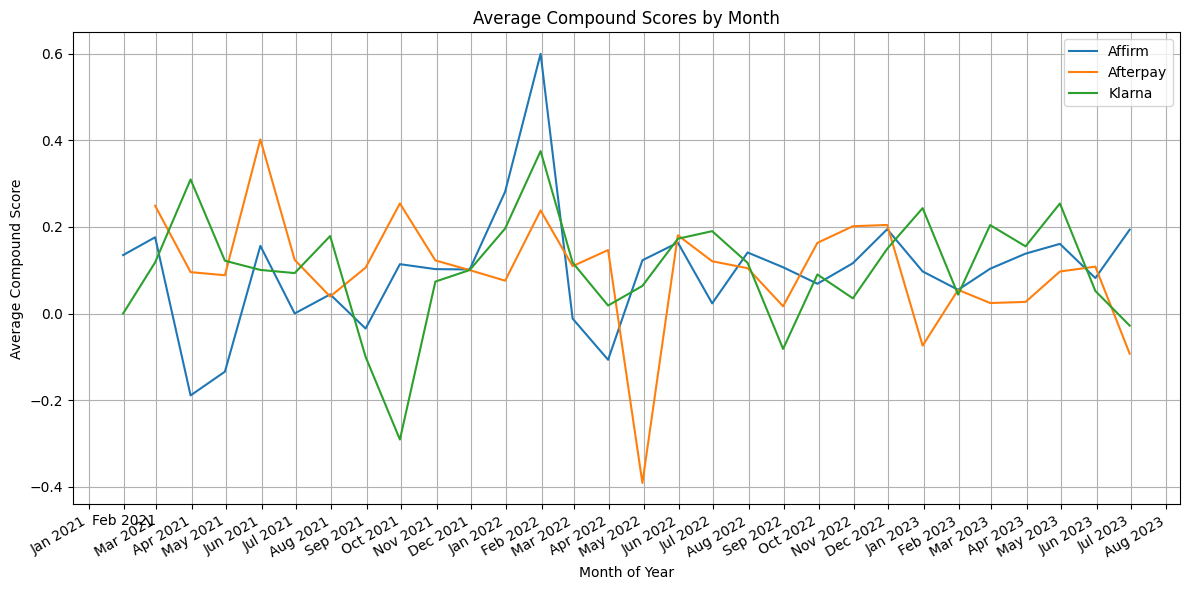

In [ ]:

df_affirm_monthly = df_affirm['compound'].resample('M').mean()
df_afterpay_monthly = df_afterpay['compound'].resample('M').mean()
df_klarna_monthly = df_klarna['compound'].resample('M').mean()


plt.figure(figsize=(12, 6))

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) 
plt.gcf().autofmt_xdate()

plt.plot(df_affirm_monthly.index, df_affirm_monthly, label='Affirm')
plt.plot(df_afterpay_monthly.index, df_afterpay_monthly, label='Afterpay')
plt.plot(df_klarna_monthly.index, df_klarna_monthly, label='Klarna')

plt.xlabel('Month of Year')
plt.ylabel('Average Compound Score')
plt.title('Average Compound Scores by Month')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


This is an example of manually checking the headlines to see why there were high or low spikes during that time

In [ ]:
june_2022_titles = df_afterpay[(df_afterpay.index.month == 6) & (df_afterpay.index.year == 2020)]
print(june_2022_titles)

Empty DataFrame
Columns: [title, body, url, source, image, compound]
Index: []


These next are gathering statistics on mean, median, and rage for each sentiment score as well as the correlation between them. 

In [ ]:

mean_affirm = df_affirm['compound'].mean()
median_affirm = df_affirm['compound'].median()
range_affirm = df_affirm['compound'].max() - df_affirm['compound'].min()


mean_afterpay = df_afterpay['compound'].mean()
median_afterpay = df_afterpay['compound'].median()
range_afterpay = df_afterpay['compound'].max() - df_afterpay['compound'].min()

mean_klarna = df_klarna['compound'].mean()
median_klarna = df_klarna['compound'].median()
range_klarna = df_klarna['compound'].max() - df_klarna['compound'].min()

print(mean_affirm, median_affirm, range_affirm)


In [ ]:
merged_df = pd.DataFrame({
    'affirm': df_affirm_monthly,
    'afterpay': df_afterpay_monthly,
    'klarna': df_klarna_monthly
})
correlation = merged_df.corr()


In [ ]:
print("Mean, Median, and Range of Compound Scores:")
print("-------------------------------------------")
print(f"Affirm - Mean: {mean_affirm:.2f}, Median: {median_affirm:.2f}, Range: {range_affirm:.2f}")
print(f"Afterpay - Mean: {mean_afterpay:.2f}, Median: {median_afterpay:.2f}, Range: {range_afterpay:.2f}")
print(f"Klarna - Mean: {mean_klarna:.2f}, Median: {median_klarna:.2f}, Range: {range_klarna:.2f}")
print("\n") 


print("Correlation Matrix:")
print("-------------------")
print(correlation.to_string())


Mean, Median, and Range of Compound Scores:
-------------------------------------------
Affirm - Mean: 0.10, Median: 0.10, Range: 1.97
Afterpay - Mean: 0.10, Median: 0.10, Range: 1.40
Klarna - Mean: 0.12, Median: 0.09, Range: 1.56


